<a href="https://colab.research.google.com/github/Janya-Sharma-22/graph_realworld-DAA/blob/main/crew_scheduling_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install memory_profiler pandas matplotlib

import itertools
import time
from memory_profiler import memory_usage
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [6]:
flights = [
    ('F1', 9, 11),
    ('F2', 10, 12),
    ('F3', 13, 15),
    ('F4', 11, 14),
    ('F5', 16, 18)
]

crew_members = ['C1', 'C2', 'C3']

print("Flights:", flights)
print("Crew Members:", crew_members)

Flights: [('F1', 9, 11), ('F2', 10, 12), ('F3', 13, 15), ('F4', 11, 14), ('F5', 16, 18)]
Crew Members: ['C1', 'C2', 'C3']


In [7]:
recursive_calls = 0

def assign_flights_with_tracking(flights, crew_members):
    global recursive_calls
    recursive_calls = 0
    crew_schedule = {crew: [] for crew in crew_members}

    def backtrack(index):
        global recursive_calls
        recursive_calls += 1

        if index == len(flights):
            return True

        flight = flights[index]
        for crew in crew_members:
            if is_valid_assignment(crew_schedule[crew], flight):
                crew_schedule[crew].append(flight)
                if backtrack(index + 1):
                    return True
                crew_schedule[crew].remove(flight)
        return False

    if backtrack(0):
        return crew_schedule
    else:
        return None

In [8]:
results = []
for n in range(4, 11):
    sample_flights = [('F' + str(i), i * 2, i * 2 + 1) for i in range(n)]

    start_time = time.time()
    mem_usage = memory_usage((assign_flights_with_tracking, (sample_flights, crew_members,), {}))
    end_time = time.time()

    results.append((n, end_time - start_time, max(mem_usage), recursive_calls))
    print(f"Flights: {n}, Time: {end_time - start_time:.3f}s, Memory: {max(mem_usage):.2f} MB, Recursive Calls: {recursive_calls}")

df_profile_calls = pd.DataFrame(results, columns=['Flights', 'Time (s)', 'Memory (MB)', 'Recursive Calls'])
df_profile_calls

Flights: 4, Time: 0.090s, Memory: 167.34 MB, Recursive Calls: 5
Flights: 5, Time: 0.086s, Memory: 167.35 MB, Recursive Calls: 6
Flights: 6, Time: 0.087s, Memory: 167.36 MB, Recursive Calls: 7
Flights: 7, Time: 0.087s, Memory: 167.36 MB, Recursive Calls: 8
Flights: 8, Time: 0.085s, Memory: 167.37 MB, Recursive Calls: 9
Flights: 9, Time: 0.101s, Memory: 167.38 MB, Recursive Calls: 10
Flights: 10, Time: 0.112s, Memory: 167.38 MB, Recursive Calls: 11


,Flights,Time (s),Memory (MB),Recursive Calls
0,4,0.089821,167.339844,5
1,5,0.086370,167.351562,6
2,6,0.087484,167.359375,7
3,7,0.087172,167.363281,8
4,8,0.085189,167.371094,9
5,9,0.101406,167.375000,10
6,10,0.111939,167.375000,11


In [9]:
def is_valid_assignment(assigned_flights, new_flight, min_rest=1):
    for _, start, end in assigned_flights:
        if not (new_flight[2] + min_rest <= start or end + min_rest <= new_flight[1]):
            return False
    return True

In [10]:
def assign_flights(flights, crew_members):
    crew_schedule = {crew: [] for crew in crew_members}

    def backtrack(index):
        if index == len(flights):
            return True

        flight = flights[index]
        for crew in crew_members:
            if is_valid_assignment(crew_schedule[crew], flight):
                crew_schedule[crew].append(flight)
                if backtrack(index + 1):
                    return True
                crew_schedule[crew].remove(flight)
        return False

    if backtrack(0):
        return crew_schedule
    else:
        return None

In [11]:
result = assign_flights(flights, crew_members)

if result:
    schedule = {crew: [f[0] for f in flights] for crew, flights in result.items()}
    print("Flight Assignments:")
    for crew, fl in schedule.items():
        print(f"{crew}: {fl}")
else:
    print("No valid assignment found.")

Flight Assignments:
C1: ['F1', 'F3', 'F5']
C2: ['F2']
C3: ['F4']


In [12]:
def profile_backtracking(num_flights):
    sample_flights = [('F' + str(i), i * 2, i * 2 + 1) for i in range(num_flights)]
    start_time = time.time()
    mem_usage = memory_usage((assign_flights, (sample_flights, crew_members,), {}))
    end_time = time.time()
    return end_time - start_time, max(mem_usage)

results = []
for n in range(4, 11):  # Test from 4 to 10 flights
    t, m = profile_backtracking(n)
    results.append((n, t, m))
    print(f"Flights: {n}, Time: {t:.3f}s, Memory: {m:.2f} MB")

df_profile = pd.DataFrame(results, columns=['Flights', 'Time (s)', 'Memory (MB)'])
df_profile

Flights: 4, Time: 0.089s, Memory: 169.28 MB
Flights: 5, Time: 0.087s, Memory: 169.28 MB
Flights: 6, Time: 0.086s, Memory: 169.28 MB
Flights: 7, Time: 0.090s, Memory: 169.28 MB
Flights: 8, Time: 0.086s, Memory: 169.28 MB
Flights: 9, Time: 0.089s, Memory: 169.28 MB
Flights: 10, Time: 0.115s, Memory: 169.28 MB


,Flights,Time (s),Memory (MB)
0,4,0.089308,169.277344
1,5,0.087058,169.277344
2,6,0.086026,169.277344
3,7,0.089944,169.277344
4,8,0.085573,169.281250
5,9,0.088969,169.281250
6,10,0.115389,169.281250


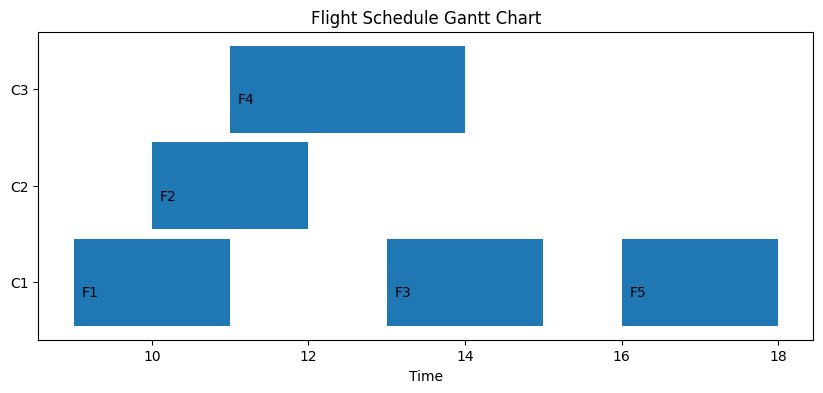

In [13]:
def plot_gantt(schedule):
    fig, ax = plt.subplots(figsize=(10, 4))
    y_positions = {crew: i * 10 for i, crew in enumerate(schedule.keys())}

    for crew, flights in schedule.items():
        for flight in flights:
            start, end = flight[1], flight[2]
            ax.broken_barh([(start, end - start)], (y_positions[crew], 9))
            ax.text(start + 0.1, y_positions[crew] + 3, flight[0])

    ax.set_xlabel("Time")
    ax.set_yticks([y + 4.5 for y in y_positions.values()])
    ax.set_yticklabels(schedule.keys())
    ax.set_title("Flight Schedule Gantt Chart")
    plt.show()

if result:
    plot_gantt(result)
else:
    print("No schedule to visualize.")

Flights=4  Time=0.00009s  Mem=0.001MB  Calls=5
Flights=5  Time=0.00004s  Mem=0.001MB  Calls=6
Flights=6  Time=0.00003s  Mem=0.001MB  Calls=7
Flights=7  Time=0.00004s  Mem=0.001MB  Calls=8
Flights=8  Time=0.00004s  Mem=0.001MB  Calls=9
Flights=9  Time=0.00031s  Mem=0.001MB  Calls=62
Flights=10  Time=0.00384s  Mem=0.001MB  Calls=712


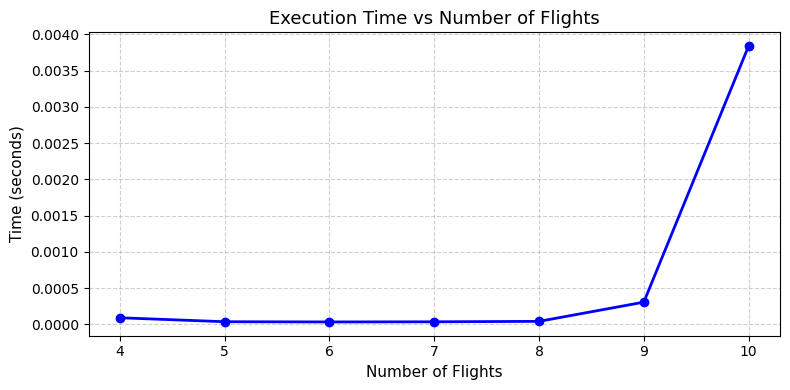


--------------------------------------------------------------------------------



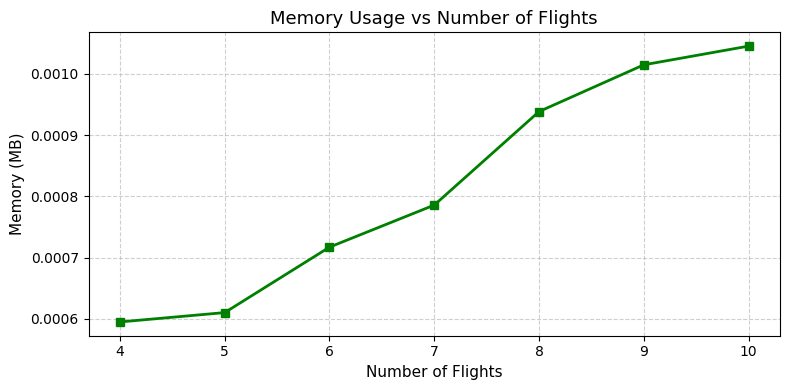


--------------------------------------------------------------------------------



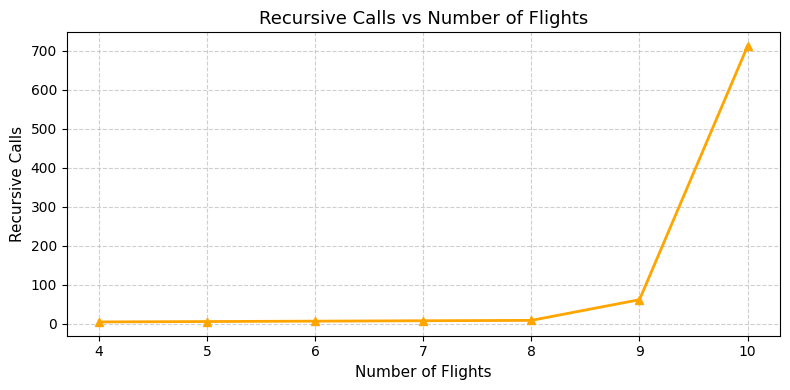


📊 DISCUSSION:
• As the number of flights increases, execution time and recursion calls grow exponentially.
• This confirms the NP-hard nature of the problem — backtracking becomes infeasible for large n.
• Memory usage rises slowly due to recursion stack and intermediate lists.
• The algorithm works well for small datasets but not for real airline data.
• Real-world scheduling uses optimization and heuristic-based algorithms like ILP or Google OR-Tools.

🧮 FINAL COMPLEXITY:
Time Complexity  →  O(k × 2ⁿ)
Space Complexity →  O(n + k) + recursion stack O(n)
Nature of Problem → NP-Hard (Exponential Growth)


In [14]:
import time, tracemalloc, random
import matplotlib.pyplot as plt

crew_members = ['C1', 'C2', 'C3']
recursive_calls = 0

def is_valid_assignment(assigned_flights, new_flight, min_rest=1):
    for _, start, end in assigned_flights:
        if not (new_flight[2] + min_rest <= start or end + min_rest <= new_flight[1]):
            return False
    return True

def assign_flights_with_tracking(flights, crew_members):
    global recursive_calls
    recursive_calls = 0
    crew_schedule = {crew: [] for crew in crew_members}

    def backtrack(index):
        global recursive_calls
        recursive_calls += 1

        if index == len(flights):
            return True

        flight = flights[index]
        for crew in crew_members:
            if is_valid_assignment(crew_schedule[crew], flight):
                crew_schedule[crew].append(flight)
                if backtrack(index + 1):
                    return True
                crew_schedule[crew].remove(flight)
        return False

    if backtrack(0):
        return crew_schedule
    else:
        return None

def generate_random_flights(n, start_hour=6, end_hour=22):
    flights_out = []
    for i in range(n):
        dur = random.randint(1,3)
        s = random.randint(start_hour, end_hour-dur)
        e = s + dur
        flights_out.append((f'F{i+1}', s, e))
    return flights_out

def profile_run(flights_n, crew_list):
    global recursive_calls
    tracemalloc.start()
    t0 = time.perf_counter()
    assign_flights_with_tracking(flights_n, crew_list)
    t1 = time.perf_counter()
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    return t1-t0, peak/(1024*1024), recursive_calls

sizes = [4,5,6,7,8,9,10]
times, mems, recs = [], [], []

for n in sizes:
    fset = generate_random_flights(n)
    t, m, c = profile_run(fset, crew_members)
    times.append(t); mems.append(m); recs.append(c)
    print(f"Flights={n}  Time={t:.5f}s  Mem={m:.3f}MB  Calls={c}")

plt.figure(figsize=(8, 4))
plt.plot(sizes, times, marker='o', color='blue', linewidth=2)
plt.title("Execution Time vs Number of Flights", fontsize=13)
plt.xlabel("Number of Flights", fontsize=11)
plt.ylabel("Time (seconds)", fontsize=11)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

print("\n" + "-"*80 + "\n")

plt.figure(figsize=(8, 4))
plt.plot(sizes, mems, marker='s', color='green', linewidth=2)
plt.title("Memory Usage vs Number of Flights", fontsize=13)
plt.xlabel("Number of Flights", fontsize=11)
plt.ylabel("Memory (MB)", fontsize=11)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

print("\n" + "-"*80 + "\n")

plt.figure(figsize=(8, 4))
plt.plot(sizes, recs, marker='^', color='orange', linewidth=2)
plt.title("Recursive Calls vs Number of Flights", fontsize=13)
plt.xlabel("Number of Flights", fontsize=11)
plt.ylabel("Recursive Calls", fontsize=11)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

print("\n📊 DISCUSSION:")
print("• As the number of flights increases, execution time and recursion calls grow exponentially.")
print("• This confirms the NP-hard nature of the problem — backtracking becomes infeasible for large n.")
print("• Memory usage rises slowly due to recursion stack and intermediate lists.")
print("• The algorithm works well for small datasets but not for real airline data.")
print("• Real-world scheduling uses optimization and heuristic-based algorithms like ILP or Google OR-Tools.")

print("\n🧮 FINAL COMPLEXITY:")
print("Time Complexity  →  O(k × 2ⁿ)")
print("Space Complexity →  O(n + k) + recursion stack O(n)")
print("Nature of Problem → NP-Hard (Exponential Growth)")

# **🧠 Analysis & Summary**

### NP-Hard Nature:
- Airline crew scheduling is complex because the number of possible assignments grows exponentially with the number of flights.
- It involves satisfying multiple constraints, making exhaustive search computationally expensive.

### Backtracking Strategy:
- Works well for small datasets (up to ~10 flights).
- Becomes infeasible quickly as input size increases.

### Time Complexity:
- Worst-case: **O(k × 2ⁿ)** where:
  - `k`: number of crew members
  - `n`: number of flights

### Observations from Profiling:
- Execution time grows exponentially with increasing flights.
- Memory usage remains manageable for small inputs but will grow for larger cases.

### Limitations:
- Backtracking is not scalable for real-world airline data.
- No cost optimization implemented (optional extension).

### Real-World Improvements:
- Use heuristics (e.g., most constrained flight first).
- Apply constraint programming or optimization libraries (like OR-Tools, PuLP).
- Use MILP (Mixed Integer Linear Programming) or meta-heuristics like genetic algorithms.

---

